In [352]:
import sys
sys.path.append('../scripts/')

In [353]:
from conn import connection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Payment Behavior Analysis

In [355]:
engine = connection()

Connection success


### Popular payment methods

In [357]:
df_payments = pd.read_sql("select * from payments", engine)

In [358]:
pay_methods = df_payments.payment_type.value_counts()

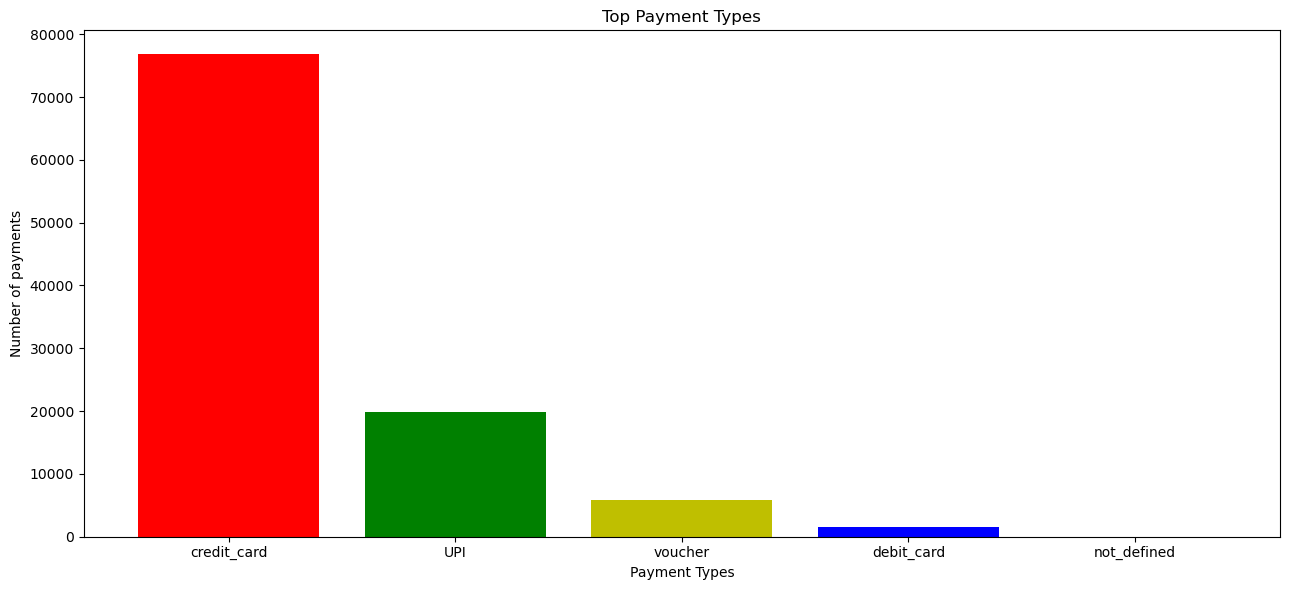

In [359]:
plt.figure(figsize=(13,6))

plt.bar(pay_methods.index, pay_methods.values, color=['r', 'g', 'y', 'b', 'r'])

plt.title('Top Payment Types')
plt.xlabel('Payment Types')
plt.ylabel('Number of payments')
plt.grid(False)
plt.tight_layout()
plt.show()

### Installments by payment type

In [361]:
df_payments.groupby('payment_type')['payment_installments'].mean().sort_values(ascending=False).reset_index()

,payment_type,payment_installments
0,credit_card,3.507155
1,UPI,1.000000
2,debit_card,1.000000
3,not_defined,1.000000
4,voucher,1.000000


### Payment value by category

In [363]:
df_cat = pd.read_sql("""
select
	p.product_category,
	round(sum(py.payment_value),2) as total_payment
from payments py
join order_items oi on py.order_id = oi.order_id
join products p on oi.product_id = p.product_id
group by p.product_category
order by total_payment desc;
""", engine)

In [364]:
df_cat['product_category'] = df_cat['product_category'].str.title()

In [365]:
df_cat = df_cat.head()

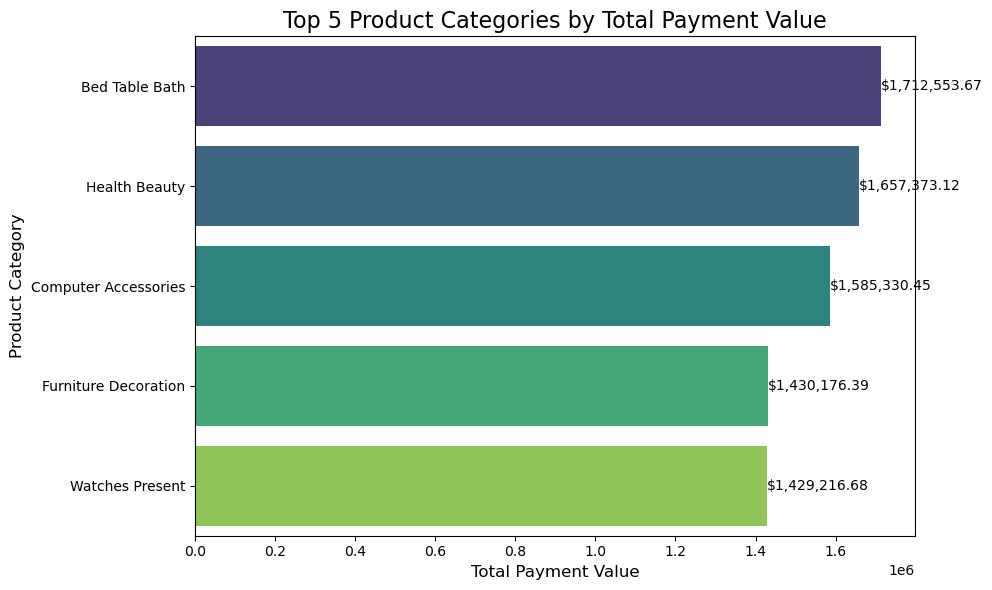

In [366]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='total_payment',
    y='product_category',
    data=df_cat,
    palette='viridis'
)

plt.title('Top 5 Product Categories by Total Payment Value', fontsize=16)
plt.xlabel('Total Payment Value', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

for index, value in enumerate(df_cat['total_payment']):
    plt.text(value + 10, index, f"${value:,.2f}", va='center')

plt.tight_layout()
plt.show()

### Top payment types by region

In [368]:
pay_df = pd.read_sql("""
select 
	py.payment_type,
    c.customer_state,
    count(*) as count
from payments py
join orders o on o.order_id = py.order_id
join customers c on c.customer_id = o.customer_id
group by c.customer_state, py.payment_type
order by c.customer_state, count desc;
""", engine)

In [388]:
pay_df = pay_df.drop_duplicates(subset=['customer_state'], keep='first')

In [390]:
pay_df

,payment_type,customer_state,count
0,credit_card,AC,61
4,credit_card,AL,341
8,credit_card,AM,124
12,credit_card,AP,47
15,credit_card,BA,2662
19,credit_card,CE,1091
23,credit_card,DF,1700
27,credit_card,ES,1573
31,credit_card,GO,1520
35,credit_card,MA,535
